<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LDA**

### (1) LDA란?
- 선형 판별 분석법
- PCA처럼 저차원 공간에 투영해 차원 축소하는 기법
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

### (2) PCA와 차이점
- PCA : 입력 데이터의 변동성의 가장 큰 축을 찾음
- LDA : 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾음
    - 클래스 분리를 최대화하기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
    - 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게 가져가는 방식

### (3) 선형대수적 분석
1. 클래스 내부의 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터 기반으로 구한다.
2. 두 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [4]:
# LDA는 PCA와 다르게 지도학습이다.
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_comp1', 'lda_comp2']
df = pd.DataFrame(iris_lda, columns=lda_columns)
df['target'] = iris.target

df

,lda_comp1,lda_comp2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


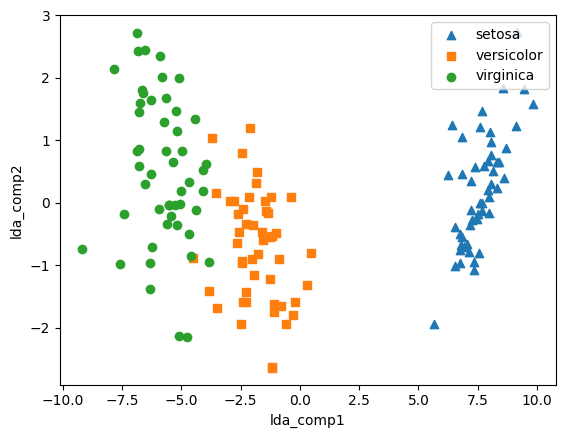

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = df[df['target']==i]['lda_comp1']
    y = df[df['target']==i]['lda_comp2']

    plt.scatter(x, y, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_comp1')
plt.ylabel('lda_comp2')
plt.show()